# Generate point simmetrical data

In [21]:
from random import random,seed,uniform
from numpy import array
import numpy

seed(0)

features=numpy.empty([1000,2],dtype=float)
targets=numpy.empty(1000,int)

for i in range(1000):
        x=uniform(-1.0,1.0)
        y=uniform(-1.0,1.0)
        if (x*x+y*y)<0.8:
            target=0
        else:
            target=1
        features[i]=(x,y)
        targets[i]=target
        
print( features.shape, targets.shape)

for i in range(0,10):
    print (features[i], targets[i])
                

(1000, 2) (1000,)
[ 0.6888437   0.51590881] 0
[-0.15885684 -0.4821665 ] 0
[ 0.02254944 -0.19013173] 0
[ 0.56759718 -0.39337455] 0
[-0.04680609  0.16676408] 0
[ 0.81622577  0.00937371] 0
[-0.43632431  0.51160841] 0
[ 0.23673799 -0.49898732] 0
[ 0.81949251  0.96557095] 1
[ 0.62043447  0.8043319 ] 1


# Plot the data

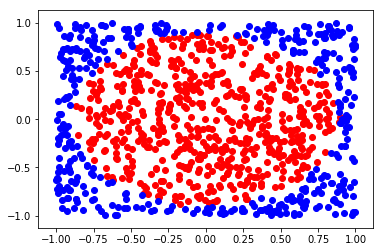

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

colors = ['red',  'blue']

for i in range(len(colors)):
    xs = features[:, 0][targets == i]
    ys = features[:, 1][targets == i]
    plt.scatter(xs, ys, c=colors[i])


In [24]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(features, targets)
print(clf.coef_)
print(clf.intercept_)

[[ 1.58528338  2.86950448]]
[-2.90060934]


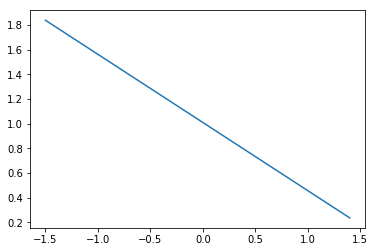

In [27]:
import numpy as np

x_min, x_max = features[:, 0].min() - .5, features[:, 0].max() + .5
y_min, y_max = features[:, 1].min() - .5, features[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.1)
ys = (-clf.intercept_[0] - xs * clf.coef_[0, 0]) / clf.coef_[0, 1]
plt.plot(xs, ys)

# Neural network

In [28]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp.fit(features, targets)
print("Training set score: %f" % mlp.score(features, targets))

Iteration 1, loss = 0.70052588
Iteration 2, loss = 0.65839141
Iteration 3, loss = 0.64841859
Iteration 4, loss = 0.62783055
Iteration 5, loss = 0.61365290
Iteration 6, loss = 0.59581320
Iteration 7, loss = 0.57634660
Iteration 8, loss = 0.55153760
Iteration 9, loss = 0.52779333
Iteration 10, loss = 0.49830565
Training set score: 0.848000


/usr/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
